<a href="https://colab.research.google.com/github/Blurr99/tensorflow_deepLearning/blob/main/03_Introduction_to_cnn_using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision using TensorFlow
Computer vision is the practice of writing algorithms which can discorver patterns in visual data. Such as the camera of a self driving car recognizing the car infront.

## Get the data
The dataset is from the Kaggle dataset Food101: https://www.kaggle.com/datasets/dansbecker/food-101.

However, its been modified to only use Pizza & Steak for now.

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-11-23 18:33:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.207, 142.251.10.207, 142.251.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.6MB/s    in 5.7s    

2023-11-23 18:33:25 (18.3 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspecting the data

A crucial step before any machine learning or deep learning project is to inspect the data.

And for a computer vision project, this usually means visualizing many samples of the data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [ ]:
import os

# Walk through the pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [ ]:
# Another way to find the number of images in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize the images, getting the class names programmatically.

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# Visualizing the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + "/" + target_class

  # Geta  random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  # plt.axis(False)

  print(f"Image shape: {img.shape}")

  return img

Image shape: (512, 512, 3)


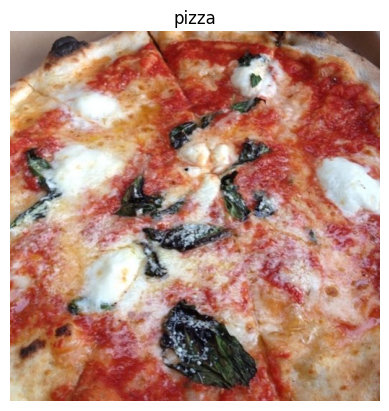

In [ ]:
# View a random image from the training dataset
img = view_random_image("pizza_steak/train", "pizza")

In [ ]:
# The images that are returned are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[185, 167, 157],
        [184, 166, 156],
        [183, 165, 155],
        ...,
        [132, 123, 118],
        [134, 126, 124],
        [133, 128, 125]],

       [[185, 167, 157],
        [184, 166, 156],
        [184, 166, 156],
        ...,
        [129, 120, 115],
        [132, 124, 121],
        [132, 127, 124]],

       [[184, 166, 156],
        [184, 166, 156],
        [184, 166, 156],
        ...,
        [123, 112, 108],
        [128, 118, 116],
        [131, 123, 120]],

       ...,

       [[222, 204, 168],
        [222, 204, 168],
        [224, 208, 174],
        ...,
        [127,  81,  45],
        [125,  77,  41],
        [121,  73,  37]],

       [[223, 203, 166],
        [223, 205, 169],
        [225, 209, 175],
        ...,
        [138,  90,  52],
        [132,  83,  43],
        [120,  71,  31]],

       [[221, 201, 164],
        [221, 203, 165],
        [222, 206, 172],
        ...,
        [149, 101,  6

In [ ]:
# Get all the pixel values betweeen 0 & 1
img / 255.

array([[[0.7254902 , 0.65490196, 0.61568627],
        [0.72156863, 0.65098039, 0.61176471],
        [0.71764706, 0.64705882, 0.60784314],
        ...,
        [0.51764706, 0.48235294, 0.4627451 ],
        [0.5254902 , 0.49411765, 0.48627451],
        [0.52156863, 0.50196078, 0.49019608]],

       [[0.7254902 , 0.65490196, 0.61568627],
        [0.72156863, 0.65098039, 0.61176471],
        [0.72156863, 0.65098039, 0.61176471],
        ...,
        [0.50588235, 0.47058824, 0.45098039],
        [0.51764706, 0.48627451, 0.4745098 ],
        [0.51764706, 0.49803922, 0.48627451]],

       [[0.72156863, 0.65098039, 0.61176471],
        [0.72156863, 0.65098039, 0.61176471],
        [0.72156863, 0.65098039, 0.61176471],
        ...,
        [0.48235294, 0.43921569, 0.42352941],
        [0.50196078, 0.4627451 , 0.45490196],
        [0.51372549, 0.48235294, 0.47058824]],

       ...,

       [[0.87058824, 0.8       , 0.65882353],
        [0.87058824, 0.8       , 0.65882353],
        [0.87843137, 0

## An end-to-end example

Building a convolutional neural network to find patterns in the images, more specifically, the following steps need to be employed:
* Load the images
* Preprocess the images
* Build a CNN to find patterns in the image
* Compile the CNN and fit the CNN to the training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess the data (getting all the pixel values between 0 & 1)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup paths to the data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

# Building a CNN model (same as the Ting VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = "valid"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compiling the model
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 26s 244ms/step - loss: 0.5957 - accuracy: 0.6860 - val_loss: 0.4472 - val_accuracy: 0.8160
Epoch 2/5
47/47 [==============================] - 7s 146ms/step - loss: 0.4557 - accuracy: 0.7960 - val_loss: 0.3763 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 6s 118ms/step - loss: 0.4137 - accuracy: 0.8187 - val_loss: 0.3853 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 7s 142ms/step - loss: 0.3367 - accuracy: 0.8647 - val_loss: 0.3370 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 6s 122ms/step - loss: 0.2524 - accuracy: 0.9007 - val_loss: 0.3852 - val_accuracy: 0.8300


In [ ]:
# Get the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Trying to use a non-CNN model for binary image classification

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the model
model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = valid_data,
            validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 120ms/step - loss: 0.7052 - accuracy: 0.4927 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 7s 145ms/step - loss: 0.6932 - accuracy: 0.4867 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 108ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 166ms/step - loss: 0.6932 - accuracy: 0.4773 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 109ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# Summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Despite having 20X more parameters than the CNN(model_1), model_2 performs terribly.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the model
model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 110ms/step - loss: 3.3927 - accuracy: 0.6300 - val_loss: 0.6223 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 5s 116ms/step - loss: 0.7784 - accuracy: 0.7340 - val_loss: 0.4681 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 6s 134ms/step - loss: 1.0497 - accuracy: 0.7120 - val_loss: 0.8156 - val_accuracy: 0.6780
Epoch 4/5
47/47 [==============================] - 5s 108ms/step - loss: 0.5413 - accuracy: 0.7733 - val_loss: 0.4707 - val_accuracy: 0.7780
Epoch 5/5
47/47 [==============================] - 7s 140ms/step - loss: 0.5183 - accuracy: 0.7793 - val_loss: 0.7539 - val_accuracy: 0.6320


In [ ]:
# Summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Bindary Classification:

1. Visualizing the data
2. Preprocess the data (standardizing / normalizing)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the modeel
6. Adjust different parameters and improve the model
7. Repeat until; satisfactory

### 1. Visualizing the data

Image shape: (384, 512, 3)
Image shape: (512, 512, 3)


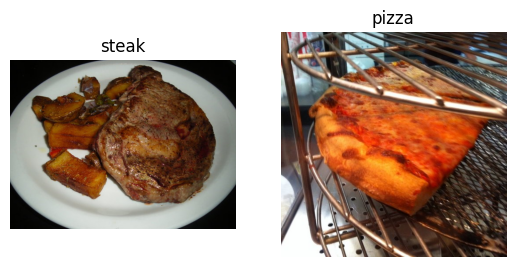

In [ ]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train","pizza")

### 2. Preprocess the data

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

The next step is to turn the data into **batches**.

A batch is a small subset of data. Rather than look at all 10,000 images at one time, a model might look at only 32 at a time.

It does this for a couple of reasons:
1. 10,000 images or more might not fit into the memory of the processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could results in the model not being able to learn very well.


Why 32?

32 is considered as the optimum batch size by the founder of CNN, Yann Leun.

In [ ]:
# Create a train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
# Load in image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               batch_size = 32)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224,224),
                                             class_mode = "binary",
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images, labels = train_data.next() # Get the 'next' batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [ ]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (starting with a baseline)

A baseline is a relatively simple model or existing result that is setup when beginning a machine learning experimenting. And as the experiments continue, the focus is to beat the baseline.

In [ ]:
# Making the model creation a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create a model (this will the baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters = 10,  # number of sliding windows sliding across the input
           kernel_size = 3, # the size of the sliding window going across an input
           strides = 1, # the size of the step a sliding window takes across an input
           padding = "valid", # if "same", output shape is same as input shape, if "valid", output shape gets compressed
           activation = "relu",
           input_shape = (224,224,3)), # Input layer (specify input shape)
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    Flatten(),
    Dense(1, activation = "sigmoid")  # Output layer (working with binary classification so only 1 neuron)
])

In [ ]:
# Compile the model
model_4.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
# Get the summary of the model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4. Fit the model

In [ ]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the data
history_4 = model_4.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 135ms/step - loss: 0.5719 - accuracy: 0.7200 - val_loss: 0.4583 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 5s 116ms/step - loss: 0.4211 - accuracy: 0.8160 - val_loss: 0.3417 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 6s 119ms/step - loss: 0.3105 - accuracy: 0.8833 - val_loss: 0.3668 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 6s 132ms/step - loss: 0.1886 - accuracy: 0.9360 - val_loss: 0.3808 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 6s 130ms/step - loss: 0.1134 - accuracy: 0.9680 - val_loss: 0.3649 - val_accuracy: 0.8360


## 5. Evaluating the model

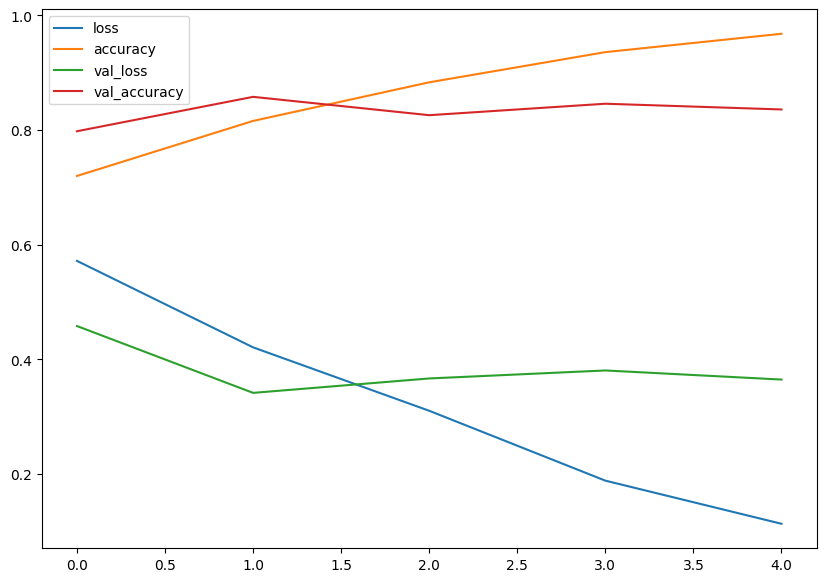

In [ ]:
# Plotting the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [ ]:
pd.DataFrame(history_4.history)

,loss,accuracy,val_loss,val_accuracy
0,0.571910,0.720000,0.458287,0.798
1,0.421086,0.816000,0.341687,0.858
2,0.310467,0.883333,0.366842,0.826
3,0.188586,0.936000,0.380773,0.846
4,0.113373,0.968000,0.364900,0.836


In [ ]:
def plot_loss_curves(history):
  """
    Returns seperate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label = "training loss")
  plt.plot(epochs, val_loss, label = "validation loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "training accuracy")
  plt.plot(epochs, val_accuracy, label = "validation accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

When a model's **validation loss starts to increase**, its likely that the model is **overfitting** the training dataset. This means its learning the patterns in the training dataset too well and thus the model's ability to generalize well will be diminished.

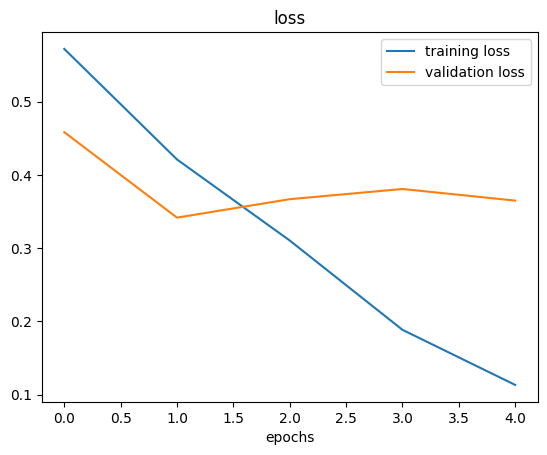

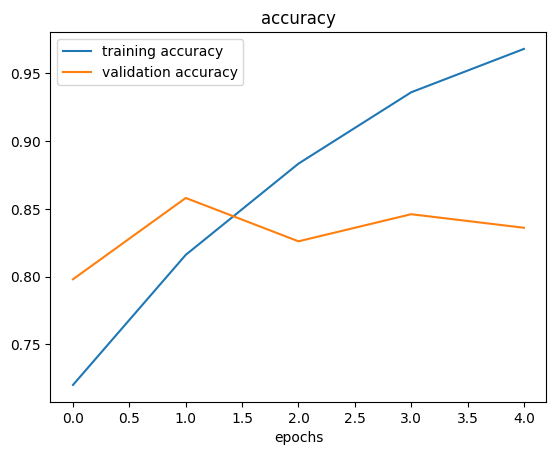

In [ ]:
# Checking the los curves of history_4
plot_loss_curves(history_4)

### 6. Adjusting the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of the flattened layer

Ways to reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data

> Reducing overfitting is also known as `Regularization`

In [ ]:
# Create a model (new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

In [ ]:
# Compile the model
model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 157ms/step - loss: 0.6114 - accuracy: 0.6707 - val_loss: 0.4792 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 5s 114ms/step - loss: 0.4671 - accuracy: 0.7840 - val_loss: 0.3686 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 12s 256ms/step - loss: 0.4219 - accuracy: 0.8127 - val_loss: 0.3431 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 8s 171ms/step - loss: 0.3913 - accuracy: 0.8213 - val_loss: 0.3575 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3735 - accuracy: 0.8340 - val_loss: 0.3028 - val_accuracy: 0.8700


In [ ]:
# Summary of a model with MaxPooling layer
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

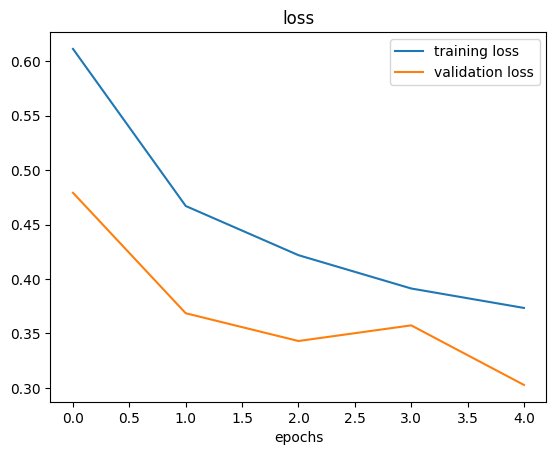

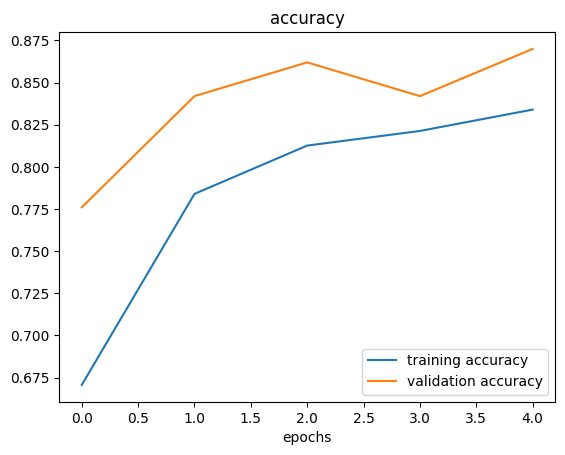

In [ ]:
# Plot loss curves
plot_loss_curves(history_5)

### Data Augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                               rotation_range = 0.2,
                                               shear_range = 0.2,
                                               zoom_range = 0.2,
                                               width_shift_range = 0.2,
                                               height_shift_range = 0.2,
                                               horizontal_flip = True)

# Create ImageDataGenerator without augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)

# Create ImageDataGenerator without data augmentation for the test data
test_datagen = ImageDataGenerator(rescale = 1/255.)

Data augmentation is the process of altering the training data, leading it to have more diversity and in turn allowing the models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size = (224,224),
                                                                 batch_size = 32,
                                                                 class_mode = "binary",
                                                                 shuffle = False)

# Create non-augmented train data batches
print("Non-augnmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "binary",
                                               shuffle = False)

# Create non-augmented test data batches
print("Non-augnmented testing data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = "binary",
                                             shuffle = False)

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augnmented training data
Found 1500 images belonging to 2 classes.
Non-augnmented testing data
Found 500 images belonging to 2 classes.


> **Note:** Data augmentation is usually only performed on training data. Using `ImageDataGenerator` built-in data augmentation parameters, our images are left as they are in the directories but are modified as theyre loaded in the model.

Visualize some augmented training data

In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()  # note: labels arent augmented only images are

Showing image number 0


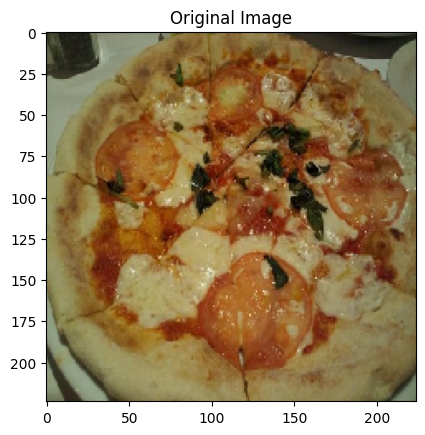

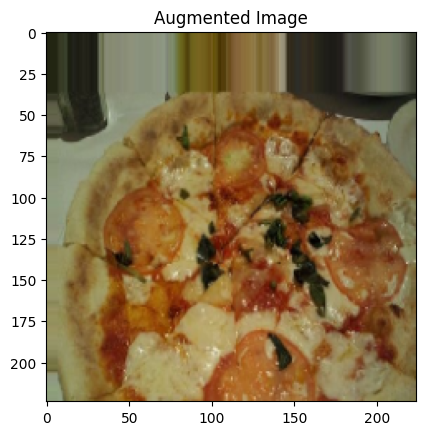

In [ ]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32)
print(f"Showing image number {random_number}")
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis = False
plt.figure()

plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis = False;

### Creating a model (same as model_5) but fitting it with augmented data

In [ ]:
# Setup the random seed
tf.random.set_seed(42)

# Create a model
model_6 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

In [ ]:
# Compiling the model
model_6.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
# Fitting the model
history_6 = model_6.fit(train_data_augmented,
            epochs = 5,
            steps_per_epoch = len(train_data_augmented),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 38s 746ms/step - loss: 0.7672 - accuracy: 0.5180 - val_loss: 0.6897 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 31s 647ms/step - loss: 0.6932 - accuracy: 0.5053 - val_loss: 0.6825 - val_accuracy: 0.5820
Epoch 3/5
47/47 [==============================] - 35s 754ms/step - loss: 0.7056 - accuracy: 0.5460 - val_loss: 0.6702 - val_accuracy: 0.5920
Epoch 4/5
47/47 [==============================] - 35s 744ms/step - loss: 0.6724 - accuracy: 0.6173 - val_loss: 0.6383 - val_accuracy: 0.6280
Epoch 5/5
47/47 [==============================] - 26s 531ms/step - loss: 0.6547 - accuracy: 0.6373 - val_loss: 0.5712 - val_accuracy: 0.7400


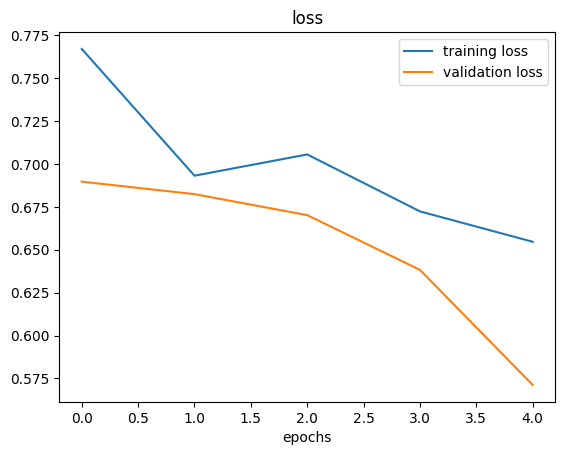

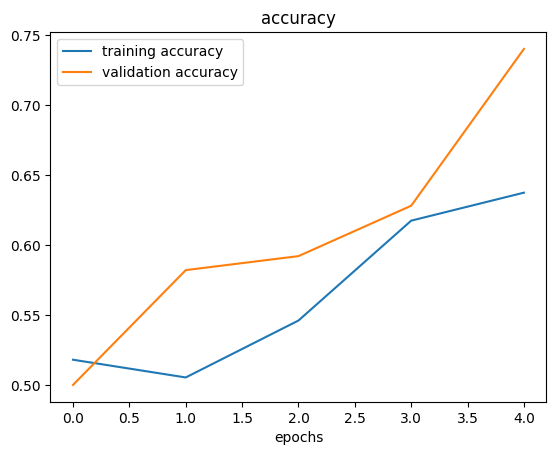

In [ ]:
plot_loss_curves(history_6)

Shuffling the augmented training data and training another model(the same as before)

In [ ]:
# Import data and shuffle it
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size = (224,224),
                                                                            class_mode = "binary",
                                                                            shuffle = True)

Found 1500 images belonging to 2 classes.


In [ ]:
# Create a model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

# Compile the model
model_7.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
            epochs = 5,
            steps_per_epoch = len(train_data_augmented_shuffled),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 440ms/step - loss: 0.6455 - accuracy: 0.6347 - val_loss: 0.4914 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 27s 568ms/step - loss: 0.5105 - accuracy: 0.7507 - val_loss: 0.3626 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 24s 511ms/step - loss: 0.4643 - accuracy: 0.7880 - val_loss: 0.3315 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 23s 484ms/step - loss: 0.4392 - accuracy: 0.8027 - val_loss: 0.3544 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 20s 435ms/step - loss: 0.4481 - accuracy: 0.8060 - val_loss: 0.3189 - val_accuracy: 0.8800


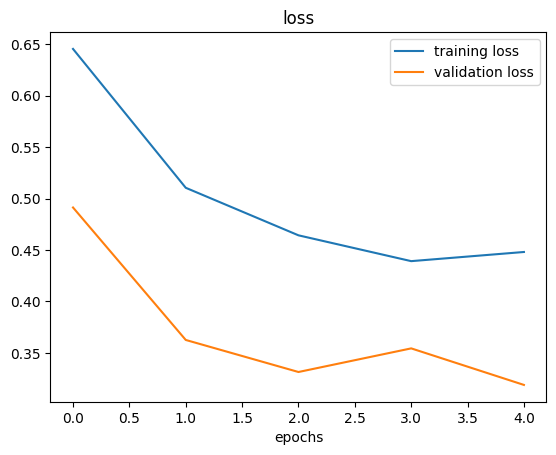

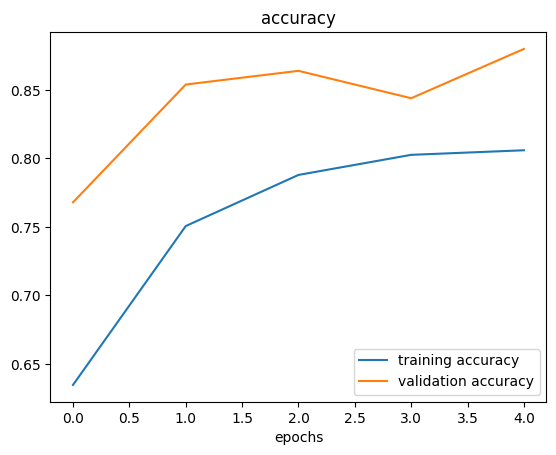

In [ ]:
# Plot loss curves
plot_loss_curves(history_7)

### 7. Repeat until satisfied

Since the latest model beats the baseline model, a feww things can be tried to improve the model.

* Increase the number of model layers (eg add mode `Conv2D`/`MaxPool2D` layers).
* Increase the number of filters in each convolutional layer (eg from 2 to 10).
* Train for longer (more epochs).
* Find an ideal learning rate.
* Get more data
* Use **transfer learning** to leverage what another image model has learnt and adjust it for this problem.

## Making a prediction with the trained model on custom data

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")

--2023-11-23 18:44:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2023-11-23 18:44:33 (165 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



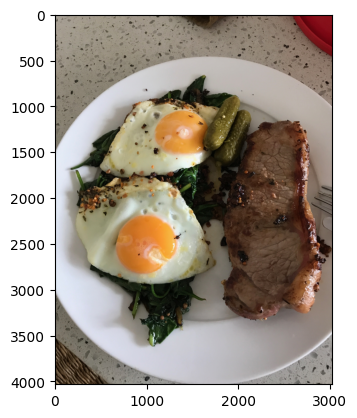

In [ ]:
plt.imshow(steak)

In [ ]:
steak.shape, steak

((4032, 3024, 3),
 array([[[162, 158, 149],
         [163, 159, 150],
         [166, 162, 153],
         ...,
         [136,  17,  23],
         [140,  21,  27],
         [140,  21,  27]],
 
        [[164, 160, 151],
         [164, 160, 151],
         [164, 160, 151],
         ...,
         [133,  14,  20],
         [134,  15,  21],
         [137,  18,  24]],
 
        [[166, 162, 153],
         [165, 161, 152],
         [163, 159, 150],
         ...,
         [136,  17,  23],
         [134,  15,  21],
         [136,  17,  23]],
 
        ...,
 
        [[154, 132, 111],
         [142, 121, 100],
         [101,  80,  59],
         ...,
         [164, 155, 148],
         [152, 141, 135],
         [140, 129, 123]],
 
        [[141, 119,  96],
         [138, 118,  94],
         [106,  85,  64],
         ...,
         [158, 147, 141],
         [142, 131, 125],
         [138, 127, 121]],
 
        [[148, 126, 102],
         [148, 128, 103],
         [114,  93,  72],
         ...,
         [

> When making prediction on a custom data, its important the custom data is preprocessed into the same format as the data the model was trained on.

In [ ]:
# Create a function to import an image and resize it to be able to be used with the model
def load_and_prep_img(filename, img_shape = 224):
  """
    Reads an image from filename, turns it into a tensor and reshapes it into (img_shape, img_shape, color_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])
  # Rescall the image and get all values between 0 and 1
  img = img / 255.
  return img

In [ ]:
steak = load_and_pred_img("03-steak.jpeg")
steak, steak.shape

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],
 
        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],
 
        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],
 
        ...,
 
        [[0.49313724, 0.42745098

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis = 0))

1/1 [==============================] - 0s 30ms/step


The custom image is being put through the model but it outputs a prediction probability. Making a helper function that displays the image and shows the predicted class name.

In [ ]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names = class_names):
  """
    Imports an image located at filename, makes a prediction with model and
    plots the image with the predicted class name as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep_img(filename)

  # Make prediction
  pred_prob = model.predict(tf.expand_dims(img, axis = 0))

  # Converting the prediction probability into class names
  pred_class = class_names[int(tf.round(pred_prob))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}");


1/1 [==============================] - 0s 30ms/step


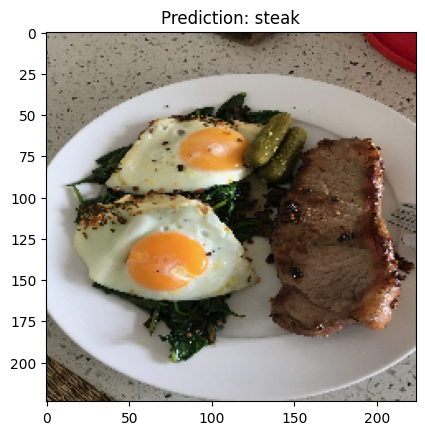

In [ ]:
pred_and_plot(model_7, "03-steak.jpeg")

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
img = mpimg.imread("03-pizza-dad.jpeg")

--2023-11-23 19:11:56--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2023-11-23 19:11:56 (178 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



1/1 [==============================] - 0s 20ms/step


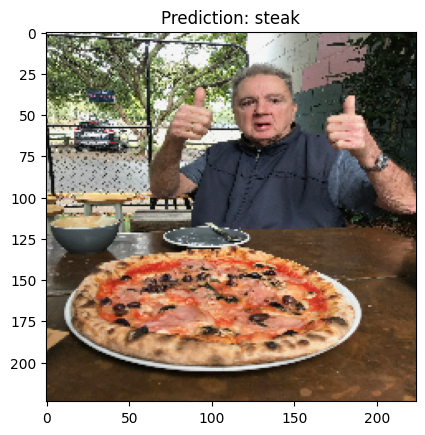

In [ ]:
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multi-class Image Classification

Trying to build a multiclass image classification with 10 classes of food.

1. Exploring the data
2. Preprocess the data
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameter and try to improve the model (try to beat the baseline/ reduce overfitting)
7. Repeat until satisfied

## 1. Importing the data and exploring the data

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-11-23 19:50:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.167.207, 142.251.16.207, 172.253.62.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.167.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  52.1MB/s    in 6.3s    

2023-11-23 19:50:42 (78.5 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk through 10 classes of image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 0 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data/train.
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger.
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak.
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon.
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza.
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice.
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi.
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings.
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream.
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry.
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen.
There are 10 directorie

In [ ]:
# Setup the train and test directories
train_dir = "/content/10_food_classes_all_data/train/"
test_dir = "/content/10_food_classes_all_data/test/"

In [ ]:
# Getting the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Image shape: (512, 512, 3)


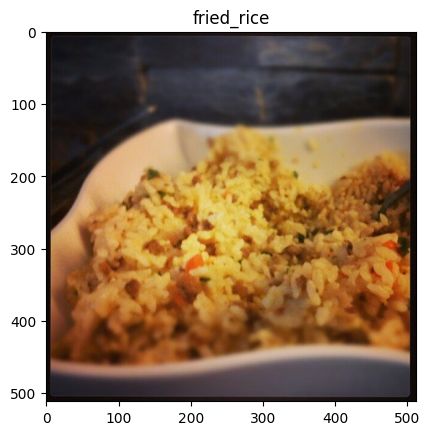

In [ ]:
# Visualizing the data
import random
img = view_random_image(target_dir=train_dir,
                        target_class = random.choice(class_names))

### 2. Preprocess the data (and prepare it for a model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1 / 255.)
test_datagen = ImageDataGenerator(rescale = 1 / 255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = "categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
# Setup random seed
tf.random.set_seed(42)

# Create a model
model_8 = Sequential([
    Conv2D(10, 3, input_shape = (224, 224, 3)),
    Activation(activation="relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")
])

# Compile the model
model_8.compile(loss = "categorical_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

### 4. Fit the model

In [ ]:
history_8 = model_8.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
 14/235 [>.............................] - ETA: 6:28 - loss: 2.3298 - accuracy: 0.1094

KeyboardInterrupt: ignored

### 5. Evaluate the model

In [ ]:
model_8.evaluate(test_data)

In [ ]:
# Checking the model's loss curves
plot_loss_curves(history_8)

The model seems to be **oevrfitting** on the train data. In other words, its getting great results on the train data but fails to generalize well to unseen data.

### 6. Adjust the model's hyperparameters

Few ways to reduce **overfitting**:
* **Get more data**
* **Simplify the model**
* **Use data augmentation**
* **Use transfer Learning**

In [ ]:
# Trying to simplify the model
# Removing 2 convolutional layers

model_9 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")
])

model_9.compile(loss = "categorical_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

history_9 = model_9.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

In [ ]:
model_8.summary()

In [ ]:
plot_loss_curves(history_9)

"Simplifying the model" experiment didnt work... the accuracy went down...

Trying Data Augmentation

### Trying to reduce overfitting using data augmentation

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale = 1 / 255.,
                                             rotation_range = 0.2,
                                             width_shift = 0.2,
                                             height_shift_range = 0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip = True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size = 32,
                                                                   class_mode = "categorical")

In [ ]:
# Creating a model and fitting it on augmented data
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model
model_10.compile(loss = "categorical_crossentropy",
                 optimizer = Adam(),
                 metrics = ["accuracy"])

# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs = 5,
                          steps_per_epoch = len(train_data_augmented),
                          validation_data = test_data,
                          validation_setps = len(test_data))

In [ ]:
model_10.evaluate(test_data)

In [ ]:
plot_loss_curve(history_10)

### 7. repeat until satisfied

The model's predictions could be improved by:
- restructuring the model's architecture (increasing layers / hidden units)
- adjust the learning rate
- try different methods of data augmentation
- training for longer
- try **transfer learning**

### Making prediction on custom data

Using the trained model to make predictions on custom data

In [ ]:
# Download custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2023-11-23 20:28:44--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.03s   

2023-11-23 20:28:44 (103 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2023-11-23 20:28:44--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting 

In [ ]:
# Reconfiguring the pred_and_plot function
def pred_and_plot(model, filename, class_names = class_names):
  """
    Imports an image located at filename, makes a prediction with model and
    plots the image with the predicted class name as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep_img(filename)

  # Make prediction
  pred_prob = model.predict(tf.expand_dims(img, axis = 0))

  # Add logic for multi-class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred_prob[0])]
  else:
    pred_class = class_names[int(tf.round(pred_prob[0]))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}");


In [ ]:
pred_and_plot(model_10, "03-sushi.jpeg", class_names)

In [ ]:
pred_and_plot(model_10, "03-hamburger.jpeg", class_names)

In [ ]:
## Saving and Loading the model

In [ ]:
model_10.save("saved_trained_model_10")

In [ ]:
# Load in trained model
loaded_model_10 = tf.keras.model.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)